**Goal:** 
1) Load all the newick trees and find the height of the trees
2) Add the extra information like height, number of tips and is_ultametric to the dataframe
3) Plot a histogram of the height of the trees

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path
import dendropy
from tqdm import tqdm

plt.style.use('dark_background')

In [3]:
def load_trees(tree_path:Path):
    """Function to load the trees:
    Input: The tree path 
    Output: Tree object"""
    return dendropy.Tree.get(path=str(tree_path),schema="newick")

In [4]:
def compute_height(tree:dendropy.Tree):
    tree.calc_node_root_distances()
    tip_distance=[leaf.root_distance for leaf in tree.leaf_node_iter()]
    height=float(max(tip_distance) if tip_distance else 0.0)
    n_tips=len(tip_distance)
    is_ultrametric=bool(np.allclose(tip_distance, tip_distance[0])) if tip_distance else True
    return height,is_ultrametric



In [5]:
def main():
    base_path=Path.cwd().parent
    file_path=base_path/"outputs"/"Canonical-OneShift-TipsConditioned"/"metadata.csv"
    trees_df=pd.read_csv(file_path)

    height=[]
    is_ultametric=[]


    for file_id in tqdm(trees_df["file_id"].to_list()):
        tree_path=base_path/"outputs"/"Canonical-OneShift-TipsConditioned"/"data"/f"{int(file_id)}.nwk"
        tree=load_trees(tree_path)
        h,u=compute_height(tree)
        height.append(h)
        is_ultametric.append(u)

    trees_df["height"]=height
    trees_df["is_ultrametric"]=is_ultametric

    output_csv=base_path/"outputs"/"Canonical-OneShift-TipsConditioned"/"preprocessed_parameters.csv"
    trees_df.to_csv(output_csv,index=False)
    print(f"Saved to: {output_csv}")

    sns.histplot(trees_df,x=height,kde=True)

    

100%|██████████| 1000/1000 [00:33<00:00, 29.69it/s]


Saved to: c:\Users\khadk\OneDrive\Desktop\phylogenetics\outputs\Canonical-OneShift-TipsConditioned\preprocessed_parameters.csv


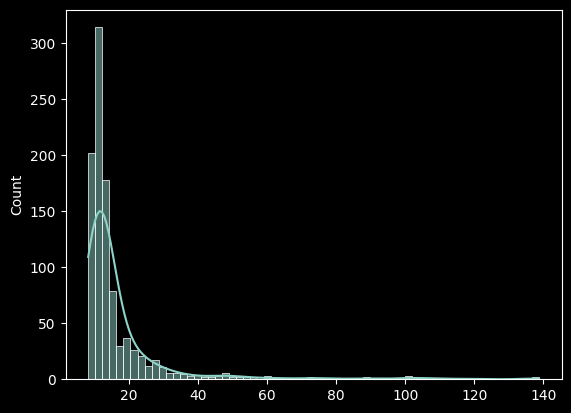

In [6]:
if __name__== "__main__":
    main()

In [7]:
base_path=Path.cwd().parent
file_path=base_path/"outputs"/"Canonical-OneShift-TipsConditioned"/"preprocessed_parameters.csv"

df=pd.read_csv(file_path)
df.shape

(1000, 9)

In [8]:
df["height"].describe().T

count    1000.000000
mean       16.807071
std        15.321395
min         8.215854
25%        10.570715
50%        12.186485
75%        15.532615
max       138.730131
Name: height, dtype: float64

In [9]:
df["t1"].describe().T

count    1000.000000
mean        5.972679
std         1.146073
min         4.003567
25%         5.005405
50%         5.915268
75%         6.946861
max         7.986751
Name: t1, dtype: float64

In [10]:
df[df["height"]<10]

,file_id,t1,la1,mu_over_la1,psi,la2_multiplier,n_tips,height,is_ultrametric
2,6,5.408794,0.396355,0.413940,0.905547,3.557958,172,9.732844,False
5,2,4.994207,0.538229,0.314260,0.335553,2.860878,250,9.962980,False
9,15,4.619674,0.378118,0.002906,0.831450,2.768860,635,9.111310,False
16,3,4.472277,0.791445,0.528616,0.859941,2.538150,585,8.487772,False
20,0,4.482161,0.497817,0.066191,0.708665,2.018186,149,8.595917,False
...,...,...,...,...,...,...,...,...,...
964,958,4.536333,0.974659,0.251697,0.433243,2.057959,469,9.017035,False
967,973,4.165471,0.974225,0.662147,0.979964,2.211532,272,8.732498,False
983,974,5.166011,0.323343,0.651137,0.791627,4.157059,721,9.205236,False
995,992,4.796496,0.474308,0.592451,0.986304,2.942214,412,9.694967,False


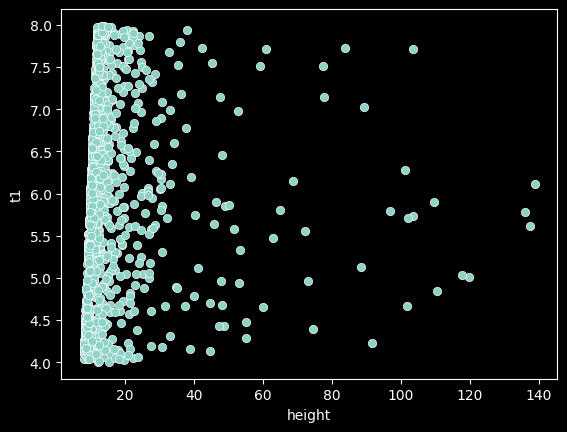

In [11]:
sns.scatterplot(df,x='height',y='t1')
plt.show()

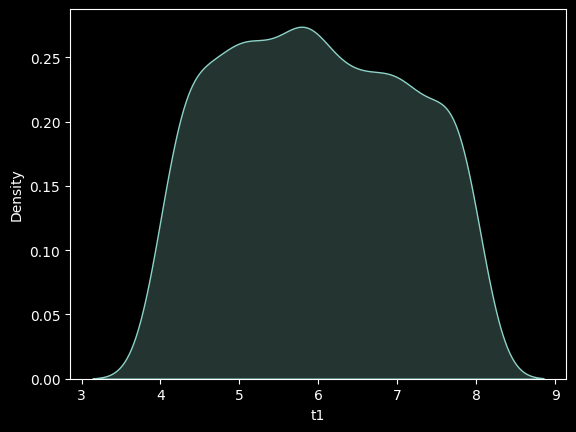

In [12]:
sns.kdeplot(df,x="t1",fill=True)
plt.show()

In [13]:
df[df["height"]>138]

,file_id,t1,la1,mu_over_la1,psi,la2_multiplier,n_tips,height,is_ultrametric
581,561,6.111441,0.010654,0.087304,0.404467,2.631913,428,138.730131,False
